# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# John Hopkins (Hoppy)
# Python API Homework
# GEGT Data Science Bootcamp
# 3/17/2021

# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import random

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lng = []
cities = []

# Create a set of random lat and lng combinations
lat = np.random.uniform(lat_range[0], lat_range[1], size = 2000)
lng = np.random.uniform(lng_range[0], lng_range[1], size = 2000)
lat_lng = zip(lat, lng)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lng:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # print(lat_lng)
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

759

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Build Base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Counter to go through data
record = 0
sets = 1

# Create DataFrame
CityWeather_df = pd.DataFrame({"City":cities})
CityWeather_df["Max Temperature(F)"] = ""
CityWeather_df["Humidity(%)"] = ""
CityWeather_df["Cloudiness(%)"] = ""
CityWeather_df["Wind Speed(mph)"] = ""
CityWeather_df["Latitude"] = ""
CityWeather_df["Longitude"] = ""

# Keeps count of those cities whose weather information is successfully obtained
city_count = 0


# Interate through Records
print("\n")
print("-----------------------------")
print("Processing Incomming Records")
print("-----------------------------")

for index, row in CityWeather_df.iterrows():
    city = row["City"] 
    query_url = base_url + "appid=" + weather_api_key + '&units=imperial' + "&q=" + city
    weather_response = requests.get(query_url).json()
    
    try:
        print(f"Processing Record {record} of set {sets} ...")
        CityWeather_df.loc[index,"Max Temperature(F)"] = (weather_response["main"]["temp_max"])
        CityWeather_df.loc[index,"Humidity(%)"] = weather_response['main']['humidity']
        CityWeather_df.loc[index,"Cloudiness(%)"] = weather_response['clouds']['all']
        CityWeather_df.loc[index,"Wind Speed(mph)"] = weather_response['wind']['speed']
        CityWeather_df.loc[index,"Latitude"] = weather_response['coord']['lat']
        CityWeather_df.loc[index,"Longitude"] = weather_response["coord"]['lon']
        CityWeather_df.loc[index,"Date"] = weather_response["dt"]
        
        city_count = city_count + 1 # only increment if you get all the weather information
        
    except (KeyError, IndexError):
        print(f"The weather information for the city of \"{city}\" record #{record} of set {sets} was not found!")

    # Limit data due to quota        
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1
        
print("-----------------------------")        
print(f"Processing Complete")
print(f"Total {city_count} Cities Processed")
print("-----------------------------")



-----------------------------
Processing Incomming Records
-----------------------------
Processing Record 0 of set 1 ...
Processing Record 1 of set 1 ...
Processing Record 2 of set 1 ...
Processing Record 3 of set 1 ...
Processing Record 4 of set 1 ...
Processing Record 5 of set 1 ...
Processing Record 6 of set 1 ...
Processing Record 7 of set 1 ...
The weather information for the city of "ust-kamchatsk" record #7 of set 1 was not found!
Processing Record 8 of set 1 ...
Processing Record 9 of set 1 ...
Processing Record 10 of set 1 ...
The weather information for the city of "kerteh" record #10 of set 1 was not found!
Processing Record 11 of set 1 ...
Processing Record 12 of set 1 ...
Processing Record 13 of set 1 ...
Processing Record 14 of set 1 ...
Processing Record 15 of set 1 ...
Processing Record 16 of set 1 ...
Processing Record 17 of set 1 ...
Processing Record 18 of set 1 ...
Processing Record 19 of set 1 ...
Processing Record 20 of set 1 ...
Processing Record 21 of set 1 .

Processing Record 44 of set 4 ...
Processing Record 45 of set 4 ...
Processing Record 46 of set 4 ...
Processing Record 47 of set 4 ...
Processing Record 48 of set 4 ...
Processing Record 49 of set 4 ...
Processing Record 0 of set 5 ...
Processing Record 1 of set 5 ...
Processing Record 2 of set 5 ...
Processing Record 3 of set 5 ...
Processing Record 4 of set 5 ...
The weather information for the city of "grand centre" record #4 of set 5 was not found!
Processing Record 5 of set 5 ...
Processing Record 6 of set 5 ...
Processing Record 7 of set 5 ...
Processing Record 8 of set 5 ...
The weather information for the city of "mentok" record #8 of set 5 was not found!
Processing Record 9 of set 5 ...
Processing Record 10 of set 5 ...
Processing Record 11 of set 5 ...
Processing Record 12 of set 5 ...
Processing Record 13 of set 5 ...
The weather information for the city of "doctor pedro p. pena" record #13 of set 5 was not found!
Processing Record 14 of set 5 ...
Processing Record 15 of se

Processing Record 28 of set 8 ...
Processing Record 29 of set 8 ...
Processing Record 30 of set 8 ...
Processing Record 31 of set 8 ...
Processing Record 32 of set 8 ...
Processing Record 33 of set 8 ...
Processing Record 34 of set 8 ...
Processing Record 35 of set 8 ...
Processing Record 36 of set 8 ...
Processing Record 37 of set 8 ...
Processing Record 38 of set 8 ...
Processing Record 39 of set 8 ...
Processing Record 40 of set 8 ...
Processing Record 41 of set 8 ...
Processing Record 42 of set 8 ...
Processing Record 43 of set 8 ...
Processing Record 44 of set 8 ...
The weather information for the city of "mys shmidta" record #44 of set 8 was not found!
Processing Record 45 of set 8 ...
Processing Record 46 of set 8 ...
Processing Record 47 of set 8 ...
Processing Record 48 of set 8 ...
Processing Record 49 of set 8 ...
Processing Record 0 of set 9 ...
Processing Record 1 of set 9 ...
Processing Record 2 of set 9 ...
Processing Record 3 of set 9 ...
The weather information for the

Processing Record 39 of set 12 ...
Processing Record 40 of set 12 ...
Processing Record 41 of set 12 ...
Processing Record 42 of set 12 ...
Processing Record 43 of set 12 ...
Processing Record 44 of set 12 ...
Processing Record 45 of set 12 ...
Processing Record 46 of set 12 ...
Processing Record 47 of set 12 ...
Processing Record 48 of set 12 ...
Processing Record 49 of set 12 ...
Processing Record 0 of set 13 ...
Processing Record 1 of set 13 ...
Processing Record 2 of set 13 ...
The weather information for the city of "yirol" record #2 of set 13 was not found!
Processing Record 3 of set 13 ...
Processing Record 4 of set 13 ...
Processing Record 5 of set 13 ...
Processing Record 6 of set 13 ...
Processing Record 7 of set 13 ...
Processing Record 8 of set 13 ...
The weather information for the city of "karamea" record #8 of set 13 was not found!
Processing Record 9 of set 13 ...
Processing Record 10 of set 13 ...
Processing Record 11 of set 13 ...
Processing Record 12 of set 13 ...
Pr

In [32]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

########## Still working on section. ###########

clean_city_data = CityWeather_df.dropna(how ="any")

In [33]:
# Display Data Frame

clean_city_data.count()

City                  696
Max Temperature(F)    696
Humidity(%)           696
Cloudiness(%)         696
Wind Speed(mph)       696
Latitude              696
Longitude             696
Date                  696
dtype: int64

In [34]:
#Export DataFrame to CSV File
clean_city_data.to_csv("Clean_City_Data.csv", encoding="utf-8", index=True)   

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The plot proves that as we generally move away from the equator, temperature drops


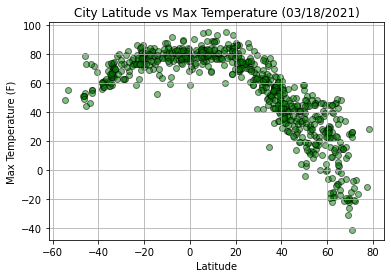

In [35]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(CityWeather_df["Latitude"]).astype(float), pd.to_numeric(CityWeather_df["Max Temperature(F)"]).astype(float), facecolors="green", edgecolors="black", alpha = 0.5)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
print("The plot proves that as we generally move away from the equator, temperature drops")

## Latitude vs. Humidity Plot

The plot shows that there is little to no pattern to describe the relationship between latitude and humidity


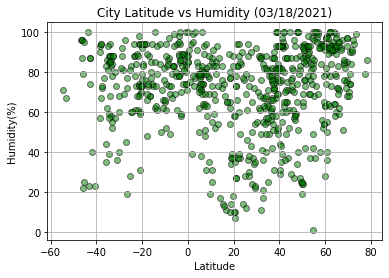

In [36]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(CityWeather_df["Latitude"]).astype(float), pd.to_numeric(CityWeather_df["Humidity(%)"]).astype(float), facecolors="green", edgecolors="black", alpha = 0.5)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs Humidity ({today})")
print("The plot shows that there is little to no pattern to describe the relationship between latitude and humidity")

## Latitude vs. Cloudiness Plot

The plot shows that there is little to no pattern to describe the relationship between latitude and cloudiness


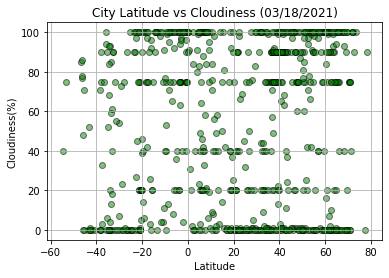

In [37]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(CityWeather_df["Latitude"]).astype(float), pd.to_numeric(CityWeather_df["Cloudiness(%)"]).astype(float), facecolors="green", edgecolors="black", alpha = 0.5)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs Cloudiness ({today})")
print("The plot shows that there is little to no pattern to describe the relationship between latitude and cloudiness")

## Latitude vs. Wind Speed Plot

The plot shows that there is little to no pattern to describe the relationship between latitude and wind speed


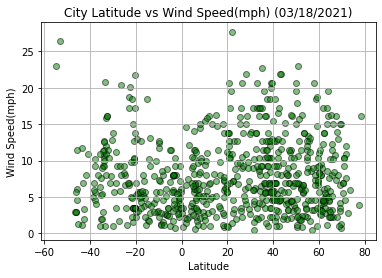

In [38]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(CityWeather_df["Latitude"]).astype(float), pd.to_numeric(CityWeather_df["Wind Speed(mph)"]).astype(float), facecolors="green", edgecolors="black", alpha = 0.5)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs Wind Speed(mph) ({today})")
print("The plot shows that there is little to no pattern to describe the relationship between latitude and wind speed")

## Linear Regression

In [39]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = CityWeather_df.loc[pd.to_numeric(CityWeather_df["Latitude"]).astype(float) > 0, :]
southern_df = CityWeather_df.loc[pd.to_numeric(CityWeather_df["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.27x + 96.45
The r-squared is: -0.8756131357154354
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


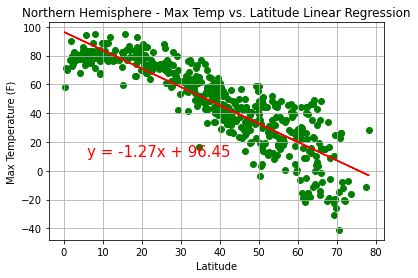

In [40]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temperature(F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="green")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.48x + 83.02
The r-squared is: 0.6995136205730983
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


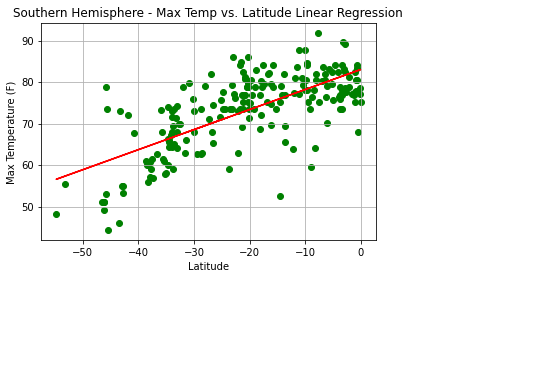

In [41]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temperature(F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="green")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.27x + 59.73
The r-squared is: 0.24240679808938476
The regression does not display much of a correlation between the data sets.


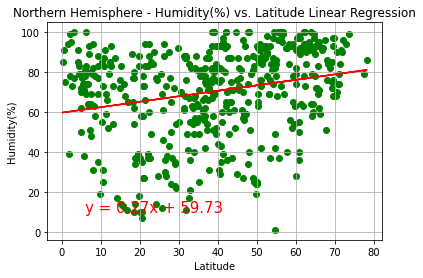

In [42]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity(%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="green")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.27x + 81.36
The r-squared is: 0.21400350874466864
The regression does not display much of a correlation between the data sets.


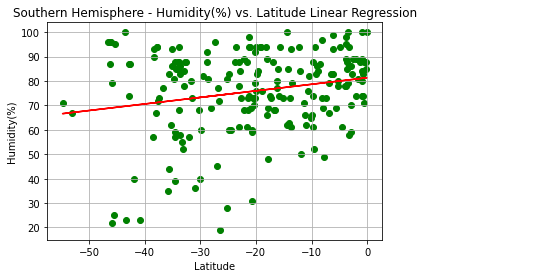

In [43]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity(%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="green")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.24x + 43.94
The r-squared is: 0.11373301499077786
The regression does not display much of a correlation between the data sets.


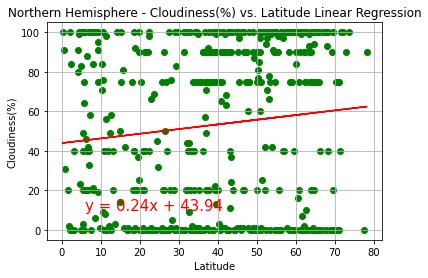

In [44]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness(%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="green")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 1.08x + 76.46
The r-squared is: 0.3653521241957656
The regression does not display much of a correlation between the data sets.


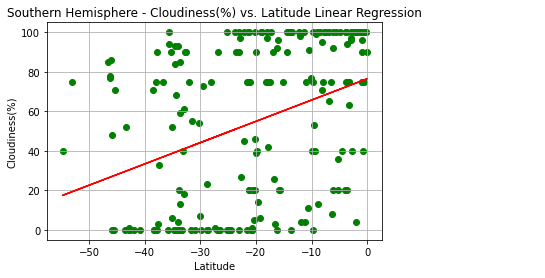

In [45]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness(%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="green")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.01x + 7.82
The r-squared is: 0.03198554748012397
The regression does not display much of a correlation between the data sets.


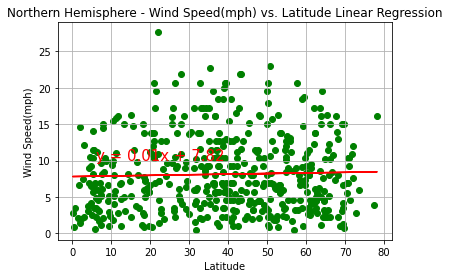

In [46]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed(mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="green")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('Northern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.09x + 5.23
The r-squared is: -0.2573043146517847
The regression shows a minor negitive correlation between the data sets.


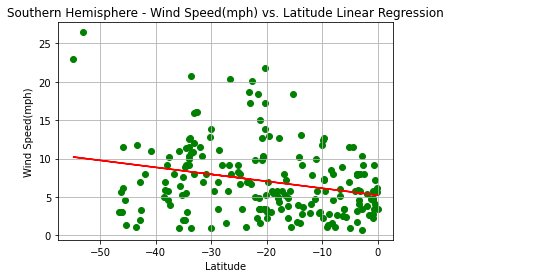

In [47]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed(mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="green")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('Southern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression shows a minor negitive correlation between the data sets.")
plt.show()